In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


XBRLファイルの文字コードを変換するためのプログラムnkfのインストール

In [2]:
!apt-get install nkf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  nkf
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 154 kB of archives.
After this operation, 367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 nkf amd64 1:2.1.5-1build3 [154 kB]
Fetched 154 kB in 1s (205 kB/s)
Selecting previously unselected package nkf.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../nkf_1%3a2.1.5-1build3_amd64.deb ...
Unpacking nkf (1:2.1.5-1build3) ...
Setting up nkf (1:2.1.5-1build3) ...
Processing triggers for man-db (2.10.2-1) ...


XBRLファイルから表情報を抽出するためのプログラムのダウンロード

In [3]:
!wget http://nlp.ds.chuo-u.ac.jp/teaching/data_science_exp_B/decode_tag.perl

--2025-06-29 23:30:33--  http://nlp.ds.chuo-u.ac.jp/teaching/data_science_exp_B/decode_tag.perl
Resolving nlp.ds.chuo-u.ac.jp (nlp.ds.chuo-u.ac.jp)... 133.91.122.136
Connecting to nlp.ds.chuo-u.ac.jp (nlp.ds.chuo-u.ac.jp)|133.91.122.136|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 825
Saving to: ‘decode_tag.perl’

decode_tag.perl     100%[===================>]     825  --.-KB/s    in 0s      

2025-06-29 23:30:34 (133 MB/s) - ‘decode_tag.perl’ saved [825/825]



openaiライブラリのインストール

In [4]:
!pip install openai

(手順1) 以下のサイトから、まだ誰も選択していない企業を選び、学籍番号と氏名を記入

https://docs.google.com/spreadsheets/d/1mBsP62wRTvwyzcLkylfRkMokTQeOYxHX/edit?usp=sharing&ouid=110881085622621163024&rtpof=true&sd=true


※ 最低でも過去6年間の有価証券報告書を分析するため、創業が新しい企業は選ばないこと。

(手順2)　EDINETのサイトから、手順1で選んだ企業の有価証券報告書(XBRL)を6年分(できればそれ以上)ダウンロードすること。検索結果には有価証券報告書と一緒に四半期報告書も表示されるが、有価証券報告書の方だけをダウンロードすること。

https://disclosure2.edinet-fsa.go.jp/WEEK0010.aspx

※ 「提出期間」を「全期間」に変更してから検索すること。

※ XBRLファイルは、Windows上ではアプリと対応付けられていないため、ダブルクリックしても中身を閲覧できない。どうしても中身を見たければ、メモ帳等で開くこと。ただし、人間が読むことを想定していないため、ほとんど理解不能。有価証券報告書の本文を確認したい場合には、XBRLではなくpdfファイルをダウンロードすること。

(手順3) ダウンロードしたXBRLはzip形式で圧縮されている。これを展開し、フォルダを下階層にたどっていくと、PublicDocというフォルダがある。その中にxbrlで終わるファイルが存在するので、それをGoogle Colaboratoryにアップロードする。

(手順4) 以下の!perlから始まる行で、入力するファイル名を、手順3でアップロードしたファイル名に置き換える。

xbrlファイルからの表情報の抽出。結果はtable_2023.txtに保存される。

**xbrlファイルからの表情報の抽出**

「jpcrp030000-asr-001_E01737-000_2023-03-31_01_2023-06-21.xbrl」は、アップロードしたXBRLファイルの名前に変更すること。

以下は2023年度のデータを分析する場合の例である。実行結果はtable_2023.txtに保存される。それ以外の年のデータを分析する場合には、以下の3箇所を変更すること。

!perl decode_tag.perl ... > table_2023.txt # 「table_2023.txt」を、「table_2022.txt」や「table_2021.txt」等に変更。

f=open('table_2023.txt','r')　# 上と同様

output_file='2023.txt' # 「2023.txt」を「2022.txt」や「2021.txt」等に変更


**ChatGPTによる表の生成**

元のxbrlファイルでは複数の表に分かれて記述されていた情報(セグメントの名称、開発費、売上高、セグメント利益、負債)をひとつの表にまとめる。


In [6]:
!cd xbrl_file; ls

jpcrp030000-asr-001_E02152-000_2015-03-31_01_2015-06-24.xbrl
jpcrp030000-asr-001_E02152-000_2016-03-31_01_2016-06-29.xbrl
jpcrp030000-asr-001_E02152-000_2017-03-31_01_2017-06-26.xbrl
jpcrp030000-asr-001_E02152-000_2018-03-31_01_2018-06-25.xbrl
jpcrp030000-asr-001_E02152-000_2019-03-31_01_2019-06-24.xbrl
jpcrp030000-asr-001_E02152-000_2020-03-31_01_2020-06-24.xbrl
jpcrp030000-asr-001_E02152-000_2021-03-31_01_2021-06-24.xbrl
jpcrp030000-asr-001_E02152-000_2022-03-31_01_2022-06-23.xbrl
jpcrp030000-asr-001_E02152-000_2023-03-31_01_2023-06-22.xbrl
jpcrp030000-asr-001_E02152-000_2024-03-31_01_2024-06-20.xbrl
jpcrp030000-asr-001_E02152-000_2025-03-31_01_2025-06-23.xbrl


In [7]:
import os

list = ["jpcrp030000-asr-001_E02152-000_2015-03-31_01_2015-06-24.xbrl",
        "jpcrp030000-asr-001_E02152-000_2016-03-31_01_2016-06-29.xbrl",
        "jpcrp030000-asr-001_E02152-000_2017-03-31_01_2017-06-26.xbrl",
        "jpcrp030000-asr-001_E02152-000_2018-03-31_01_2018-06-25.xbrl",
        "jpcrp030000-asr-001_E02152-000_2019-03-31_01_2019-06-24.xbrl",
        "jpcrp030000-asr-001_E02152-000_2020-03-31_01_2020-06-24.xbrl",
        "jpcrp030000-asr-001_E02152-000_2021-03-31_01_2021-06-24.xbrl",
        "jpcrp030000-asr-001_E02152-000_2022-03-31_01_2022-06-23.xbrl",
        "jpcrp030000-asr-001_E02152-000_2023-03-31_01_2023-06-22.xbrl",
        "jpcrp030000-asr-001_E02152-000_2024-03-31_01_2024-06-20.xbrl",
        "jpcrp030000-asr-001_E02152-000_2025-03-31_01_2025-06-23.xbrl"]

if not os.path.exists("/content/txt"):
  os.makedirs("/content/txt")


for index,file_name in enumerate(list):
  year = 2015 + index
  output_file =f"/content/txt/table_{year}.txt"

  !perl decode_tag.perl /content/xbrl_file/{file_name} > {output_file}


In [ ]:
"""# xbrlファイルからの表情報の抽出
!perl decode_tag.perl /content/jpcrp030000-asr-001_E02152-000_2025-03-31_01_2025-06-23.xbrl> table_2025.txt
"""

In [ ]:
"""prompt_table=''
f=open(f'/content/table_2025.txt','r')
for s in f:
  prompt_table+=s
output_file=f'/content/{2025}.txt'

# ChatGPTによる表の生成
client = OpenAI(
    api_key = ""
)

response = client.chat.completions.create(
    model="gpt-4o",
#    temperature=0.01,
    messages=[
        {"role": "system", "content": "あなたは金融のエキスパートです。"},
        {"role": "user", "content": '''
以下の文章から、セグメントの名称、開発費、売上高、セグメント利益、負債を抽出し、tsv形式のひとつの表にまとめよ。ただし、文章に記載されていない情報は-にしておくこと。tsv以外のデータは出力しないこと。
'''+prompt_table},
    ],
)
g=open(output_file,'w')
g.write(response.choices[0].message.content)
g.close()"""

In [ ]:

from openai import OpenAI

if not os.path.exists("/content/output"):
  os.makedirs("/content/output")

for i in range(len(list)):
  prompt_table=''
  f=open(f'/content/txt/table_{i + 2015}.txt','r')
  for s in f:
    prompt_table+=s
  output_file=f'output/{i + 2015}.txt'

  # ChatGPTによる表の生成
  client = OpenAI(
      api_key = ""
  )

  response = client.chat.completions.create(
      model="gpt-4o",
  #    temperature=0.01,
      messages=[
          {"role": "system", "content": "あなたは金融のエキスパートです。"},
          {"role": "user", "content": '''
  以下の文章から、セグメントの名称、開発費、売上高、セグメント利益、負債を抽出し、tsv形式のひとつの表にまとめよ。ただし、文章に記載されていない情報は-にしておくこと。tsv以外のデータは出力しないこと。
  '''+prompt_table},
      ],
  )
  g=open(output_file,'w')
  g.write(response.choices[0].message.content)
  g.close()

上記のセルを実行して5年分のデータ(2019.txt〜2023.txt)を生成した後、それらをChatGPTで分析する。

結果はgpt_analysis_result.txtに保存される。

In [9]:
prompt_gpt=''

for year in range(2015,2025): #2015年〜2024年
  f=open("output/"+str(year)+'.txt','r')
  prompt_gpt+='['+str(year)+'年]\n'
  for s in f:
    prompt_gpt+=s
print(prompt_gpt)
# 以下は、開発費のみ分析するようにプロンプトで指示を出している。上の各年の分析結果によｔ
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "あなたは金融のエキスパートです。"},
        {"role": "user", "content": '''
以下は、過去数年間のセグメント事業、開発費、売上高、セグメント利益、負債をまとめたものである。これらのデータのうち売上高の傾向についてわかることをまとめよ。なお、金額の単位が億円、円、１００万円など混在しているので注意すること。
'''+prompt_gpt},
    ],
)

g=open('gpt_analysis_result.txt','w')
g.write(response.choices[0].message.content)
g.close()

[2015年]
```
セグメントの名称	開発費	売上高	セグメント利益	負債
自動車	98,470	2,698,974	400,874	-
航空宇宙	4,172	142,801	18,912	-
産業機器	859	29,029	779	-
その他	7,154	7,109	1,884	-
```[2016年]
```
セグメントの名称	開発費	売上高	セグメント利益	負債
自動車	128,254	3,044,176	543,609	-
航空宇宙	6,166	152,786	18,201	-
産業機器	591	32,755	82	-
その他	648	7,478	2,894	-
```[2017年]
```
セグメントの名称	開発費	売上高	セグメント利益	負債
自動車	143,227	3,151,961	397,657	-
航空宇宙	13,891	138,759	9,102	-
その他	1,379	35,272	3,512	-
```[2018年]
```
セグメントの名称	開発費	売上高	セグメント利益	負債
自動車	133,388	3,234,866	361,454	-
航空宇宙	7,640	142,163	12,259	-
その他	325	28,192	5,066	-
```[2019年]
```
セグメントの名称	開発費	売上高	セグメント利益	負債
自動車	106,366	3,014,476	184,947	-
航空宇宙	5,525	131,669	6,047	-
その他	1,588	14,369	3,846	-
```[2020年]
```
セグメントの名称	開発費	売上高	セグメント利益	負債
自動車	119,307	3,193,949	200,263	-
航空宇宙	4,293	142,141	5,065	-
その他	2,402	8,019	3,577	-
```[2021年]
```
セグメントの名称	開発費	売上高	セグメント利益	負債
自動車	80,231	2,737,503	109,067	-
航空宇宙	5,438	87,693	△9,811	-
その他	524	5,014	3,070	-
```[2022年]
```
セグメントの名称	開発費	売上高	セグメント利益	負債
自動車	-	2,677,465	92,541	-
航空宇宙	-	62,2

In [10]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "あなたは金融のエキスパートです。"},
        {"role": "user", "content": '''
以下は、過去数年間のセグメント事業、開発費、売上高、セグメント利益、負債をまとめたものである。これらのデータから、開発費だけをリストに抽出せよ。
'''+prompt_gpt},
    ],
)

In [11]:
response.choices[0].message.content

'以下は、過去数年間の開発費のリストです。\n\n[2015年]\n- 自動車: 98,470\n- 航空宇宙: 4,172\n- 産業機器: 859\n- その他: 7,154\n\n[2016年]\n- 自動車: 128,254\n- 航空宇宙: 6,166\n- 産業機器: 591\n- その他: 648\n\n[2017年]\n- 自動車: 143,227\n- 航空宇宙: 13,891\n- その他: 1,379\n\n[2018年]\n- 自動車: 133,388\n- 航空宇宙: 7,640\n- その他: 325\n\n[2019年]\n- 自動車: 106,366\n- 航空宇宙: 5,525\n- その他: 1,588\n\n[2020年]\n- 自動車: 119,307\n- 航空宇宙: 4,293\n- その他: 2,402\n\n[2021年]\n- 自動車: 80,231\n- 航空宇宙: 5,438\n- その他: 524\n\n[2022年]\n- 自動車: -\n- 航空宇宙: -\n- その他: -\n\n[2023年]\n- 自動車: 118,539\n- 航空宇宙: 3,636\n- その他: 665\n\n[2024年]\n- 自動車: 159,452\n- 航空宇宙: 6,087\n- その他: 1,956'

2023年以前のデータを使って事業ごとに回帰分析する。回帰モデルを作成し、2024年の売上高を予測する。

2024年の実際の売上高と比較することで、モデルを評価する。

もし、2024年だけ売上高や開発費やセグメント名の抽出が失敗しているようであれば、2022年度までのデータを使って2023年度を予測、それを2023年度のデータと比較して評価すること。

セグメントが多すぎる場合には、自分で適当に３個程度選ぶこと。

※ 分析ができることを感じてもらうことがこの実験の意義なので、全部詳細にやる必要はない。

以下は、日立製作所の高機能材料の開発費を分析した例。この例では、2018年までのデータを使って2019年の開発費を予測する。

2024年の予測値: 119346.96764705842
2024年の実際の値:  166435


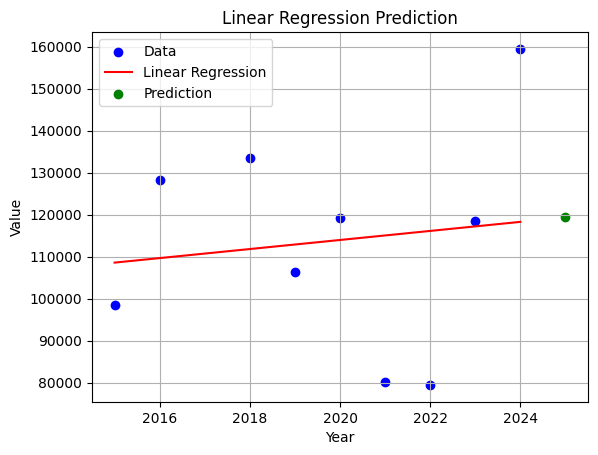

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 入力データ
x = np.array([[2015], [2016], [2017], [2018], [2019], [2020], [2021], [2022], [2023],[2024]])
y = np.array([98470, 128254, np.nan, 133388, 106366, 119307, 80231, 79441, 118539, 159452])

# 欠損値を除外
mask = ~np.isnan(y)
x_clean = x[mask]
y_clean = y[mask]

# 線形回帰モデルを定義し、データにフィットさせる
model = LinearRegression()
model.fit(x_clean, y_clean)

# 2024年の予測を行う
prediction = model.predict([[2025]])
print("2024年の予測値:", prediction[0])
print("2024年の実際の値: ", 166435)  # ここは、自分で記入すること。

# データと回帰直線のプロット
plt.scatter(x_clean, y_clean, color='blue', label='Data')  # 元のデータをプロット
plt.plot(x, model.predict(x), color='red', label='Linear Regression')  # 回帰直線をプロット
plt.scatter(2025, prediction, color='green', label='Prediction')  # 予測値をプロット
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Linear Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()